In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("advertising.csv")
dataset.head

<bound method NDFrame.head of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgenerat

In [4]:
dataset.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

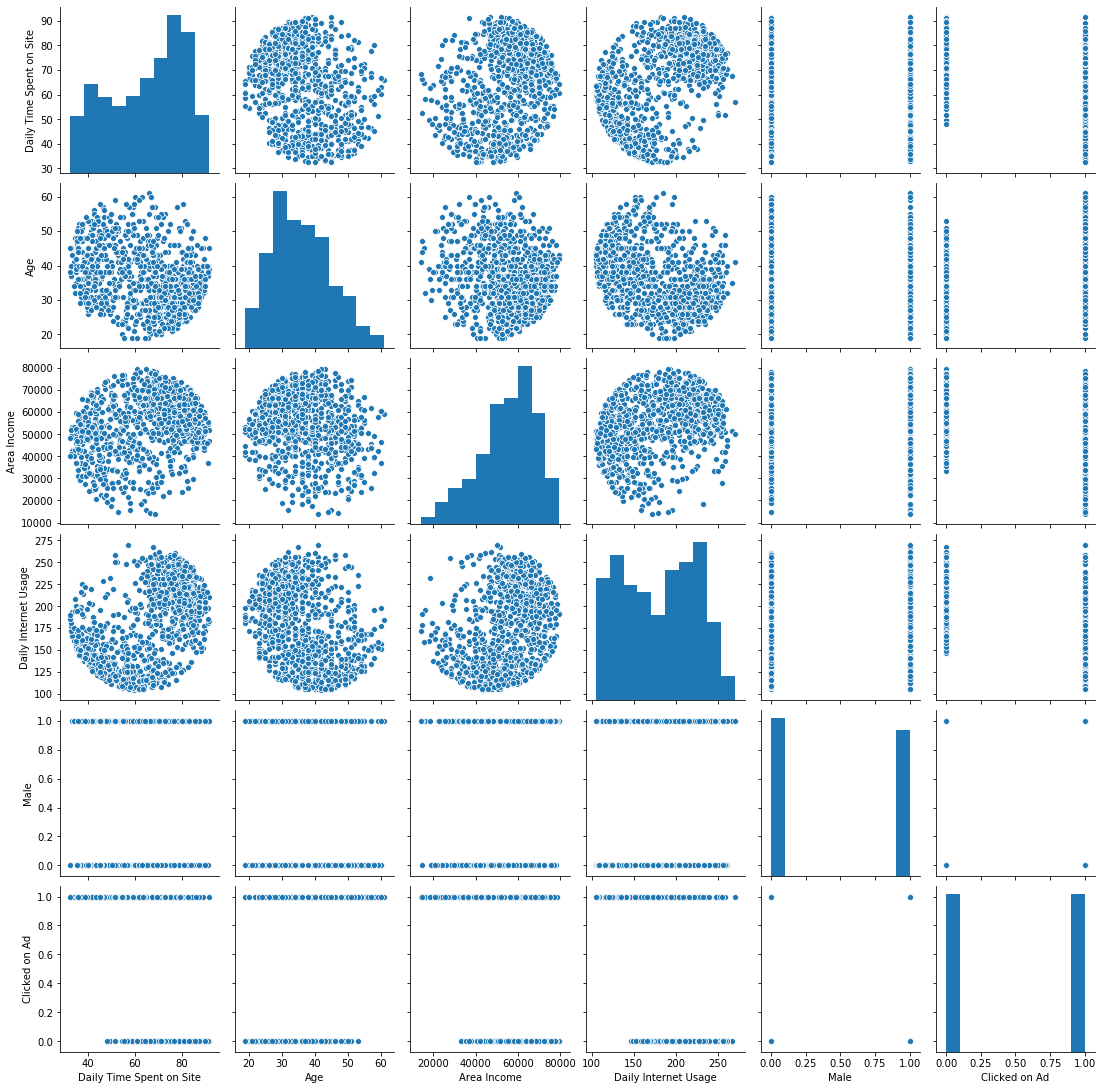

In [5]:
sns.pairplot(dataset)

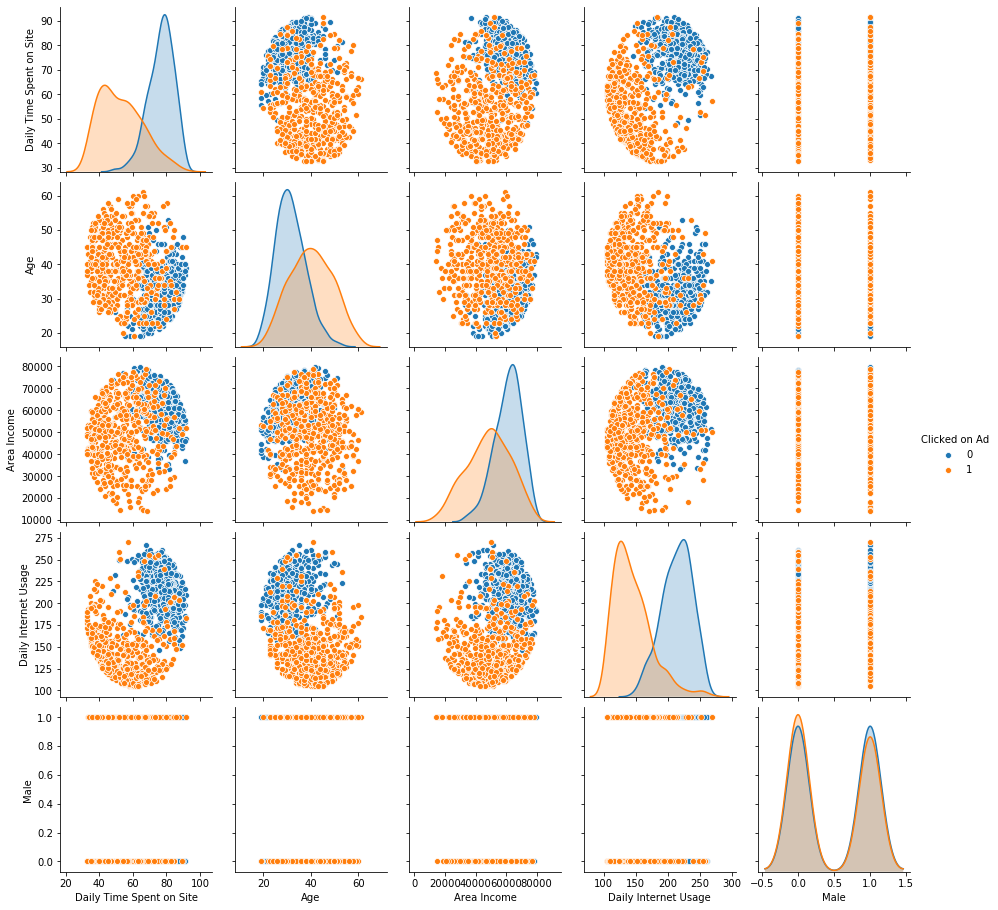

In [6]:
sns.pairplot(dataset,hue="Clicked on Ad")

In [8]:
y=dataset["Clicked on Ad"]
x=dataset.drop(["City","Ad Topic Line","Country","Timestamp"],axis=1)
x.head

<bound method NDFrame.head of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on Ad  


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
x_test.head

<bound method NDFrame.head of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
841                     61.88   45     38260.89                108.18     0   
956                     35.66   36     59240.24                172.57     0   
544                     76.59   29     67526.92                211.64     0   
173                     74.41   26     64395.85                163.05     0   
759                     85.73   32     43778.88                147.75     1   
..                        ...  ...          ...                   ...   ...   
800                     56.64   29     55984.89                123.24     1   
217                     53.30   34     44893.71                111.94     0   
565                     79.97   26     61747.98                185.45     1   
486                     83.97   40     66291.67                158.42     1   
197                     78.57   36     64045.93                239.32     1   

     Clicked on Ad  


In [23]:
reg=linear_model.LogisticRegression(C=0.01)
reg.fit(x_train,y_train)


LogisticRegression(C=0.01)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_predict=reg.predict(x_test)
confusion_matrix(y_predict,y_test)

array([[109,  17],
       [  8, 116]])

In [27]:
accuracy_score(y_test,y_predict)

0.9

In [28]:
# Using standard scaler to add standardariztion to the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.head

<bound method NDFrame.head of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
163                     75.83   24     58019.64                162.44     0   
642                     76.07   36     68033.54                235.56     0   
638                     61.04   41     75805.12                149.21     0   
264                     84.04   38     50723.67                244.55     0   
536                     76.49   23     56457.01                181.11     0   
..                        ...  ...          ...                   ...   ...   
320                     51.50   34     67050.16                135.31     0   
527                     59.61   21     60637.62                198.45     1   
996                     51.30   45     67782.17                134.42     1   
125                     79.57   31     61227.59                230.93     0   
265                     70.66   43     63450.96                120.95     1   

     Clicked on Ad  


In [30]:
x_train=sc.fit_transform(x_train)
x_train

array([[ 0.66748817, -1.38485577,  0.21895908, -0.43575856, -0.98412598,
        -0.97888944],
       [ 0.68256657, -0.00795542,  0.95531536,  1.23740435, -0.98412598,
        -0.97888944],
       [-0.26171833,  0.56575306,  1.52678619, -0.73849305, -0.98412598,
         1.02156582],
       ...,
       [-0.87365013,  1.02471984,  0.93683127, -1.07692411,  1.01613007,
         1.02156582],
       [ 0.90245993, -0.5816639 ,  0.45485061,  1.13145873, -0.98412598,
        -0.97888944],
       [ 0.34267427,  0.79523645,  0.6183426 , -1.38515038,  1.01613007,
         1.02156582]])

In [31]:
x_test=sc.fit_transform(x_test)
x_test

array([[-0.1603442 ,  1.02210347, -1.29629148, -1.52718593, -0.90088523,
         0.93792284],
       [-1.83958922,  0.01916723,  0.34067769, -0.0675586 , -0.90088523,
         0.93792284],
       [ 0.7817494 , -0.76089429,  0.98726778,  0.81810129, -0.90088523,
        -1.06618579],
       ...,
       [ 0.99821958, -1.09520637,  0.53635073,  0.22441221,  1.1100193 ,
        -1.06618579],
       [ 1.25439731,  0.46491667,  0.89088414, -0.38831845,  1.1100193 ,
        -1.06618579],
       [ 0.90855737,  0.01916723,  0.71565434,  1.44556649,  1.1100193 ,
        -1.06618579]])

In [32]:
reg.fit(x_train,y_train)

LogisticRegression(C=0.01)

In [35]:
y_predict=reg.predict(x_test)
confusion_matrix(y_test,y_predict)
# As you can see that after standardization we can increase our correct predicting values a bit
accuracy_score(y_test,y_predict)

0.988

In [ ]:
eva
